# Retail Forecasting

## 1. Data Understanding and Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('retail_data.csv')

In [4]:
df.shape

(1218, 12)

In [5]:
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0%,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0%,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17%,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0%,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,17%,0,0,0,0.0,0,0,0,0


### i. check data types

In [6]:
df.dtypes

Product                object
date                   object
Sales                   int64
Price Discount (%)     object
In-Store Promo          int64
Catalogue Promo         int64
Store End Promo         int64
Google_Mobility       float64
Covid_Flag              int64
V_DAY                   int64
EASTER                  int64
CHRISTMAS               int64
dtype: object

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.dtypes

Product                       object
date                  datetime64[ns]
Sales                          int64
Price Discount (%)            object
In-Store Promo                 int64
Catalogue Promo                int64
Store End Promo                int64
Google_Mobility              float64
Covid_Flag                     int64
V_DAY                          int64
EASTER                         int64
CHRISTMAS                      int64
dtype: object

In [9]:
df['Price Discount (%)'] = [x.replace('%', '') for x in df['Price Discount (%)']]
df['Price Discount (%)'] = df['Price Discount (%)'].astype(int)

In [10]:
df.dtypes

Product                       object
date                  datetime64[ns]
Sales                          int64
Price Discount (%)             int32
In-Store Promo                 int64
Catalogue Promo                int64
Store End Promo                int64
Google_Mobility              float64
Covid_Flag                     int64
V_DAY                          int64
EASTER                         int64
CHRISTMAS                      int64
dtype: object

All data types are correct

### ii. check missing values

In [11]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64

No missing values were found

### iii. Outliers

<AxesSubplot:xlabel='Sales', ylabel='Product'>

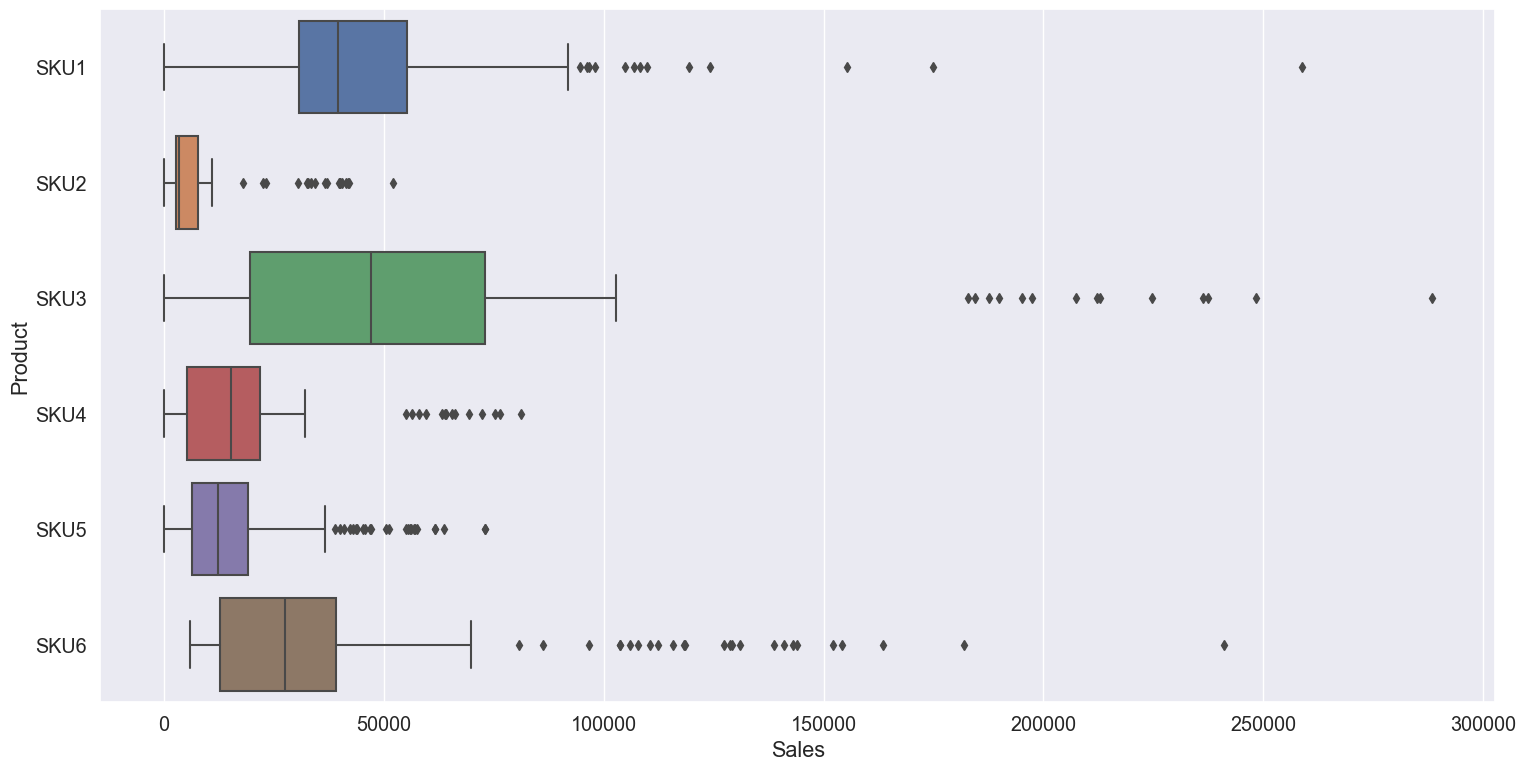

In [12]:
plt.figure(figsize=(18,9))
sns.set(font_scale = 1.3)
sns.boxplot(data = df, y = 'Product', x = "Sales", dodge=False)

According to the graphs, there are products with `Sales` equals to zero. It is believed that the testing data is mixed into the data set after checking the data.

In [14]:
# remove the 0 Sales
df = df.drop(df[df.Sales == 0].index)

<AxesSubplot:xlabel='Sales', ylabel='Product'>

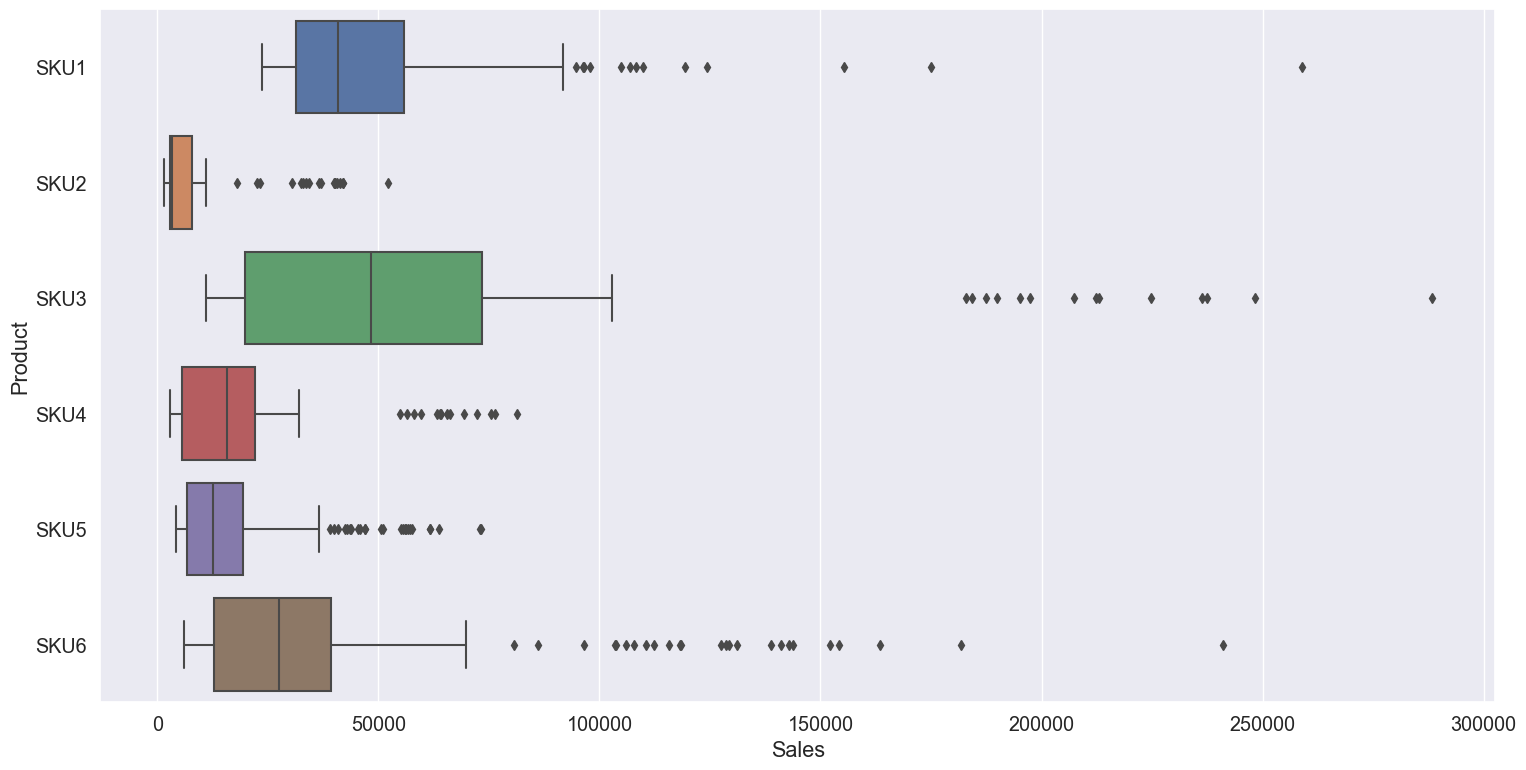

In [15]:
plt.figure(figsize=(18,9))
sns.set(font_scale = 1.3)
sns.boxplot(data = df, y = 'Product', x = "Sales", dodge=False)

After removing the `Sales` equal to zero, there are still some outliers in the `Sales` feature. But since we do not have enough information on the components for the sales, it is not appropriate to treat it as an outlier.

## 2. Exploratory Data Analysis

In [11]:
round(df.describe(datetime_is_numeric=True, include='all'),2)

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218,1218,1218.00,1218.00,1218.00,1218.00,1218.00,1218.00,1218.00,1218.00,1218.00,1218.00
unique,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SKU1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2019-01-13 02:04:08.275862016,30294.68,25.10,0.47,0.21,0.35,-2.38,0.23,0.02,0.02,0.02
min,NaN,2017-02-05 00:00:00,0.00,0.00,0.00,0.00,0.00,-28.49,0.00,0.00,0.00,0.00
25%,NaN,2018-01-21 00:00:00,7212.75,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,NaN,2019-01-13 00:00:00,19742.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,NaN,2020-01-05 00:00:00,40282.25,40.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
max,NaN,2020-12-27 00:00:00,288322.00,83.00,1.00,1.00,1.00,3.90,1.00,1.00,1.00,1.00


In [12]:
df_time = df.set_index('date')

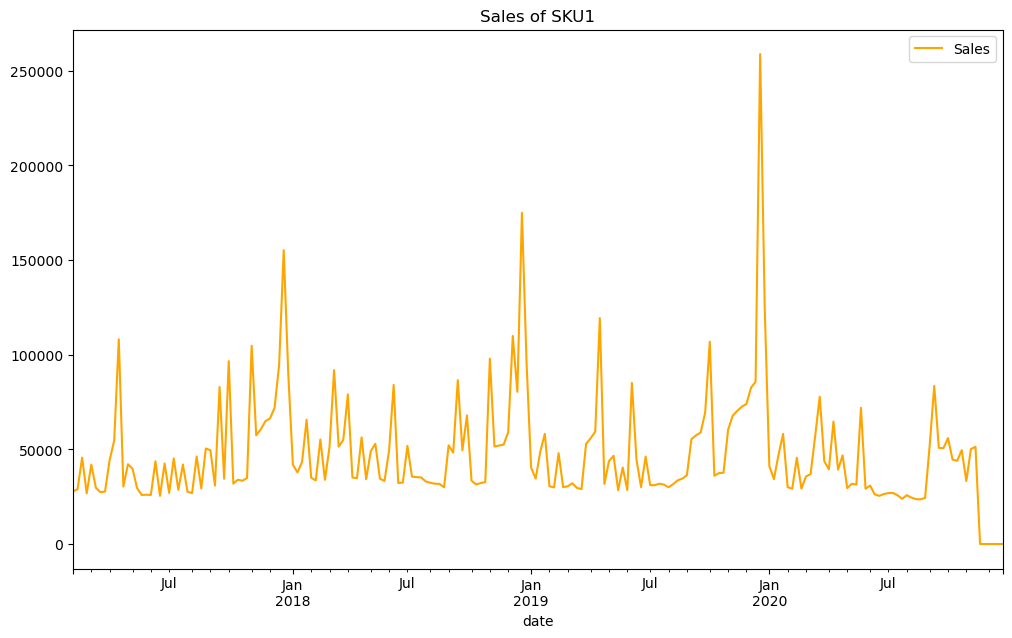

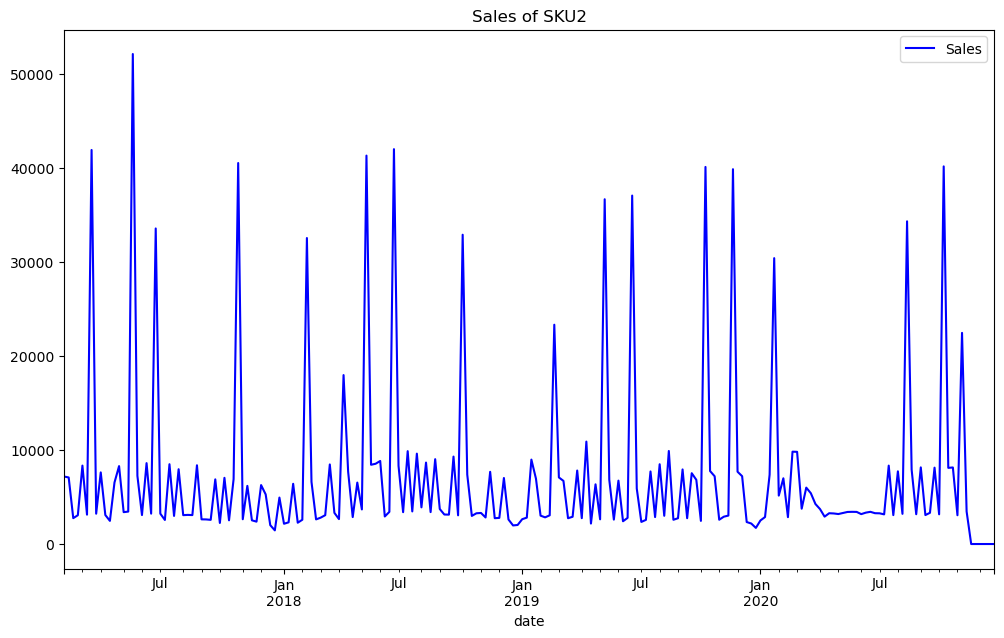

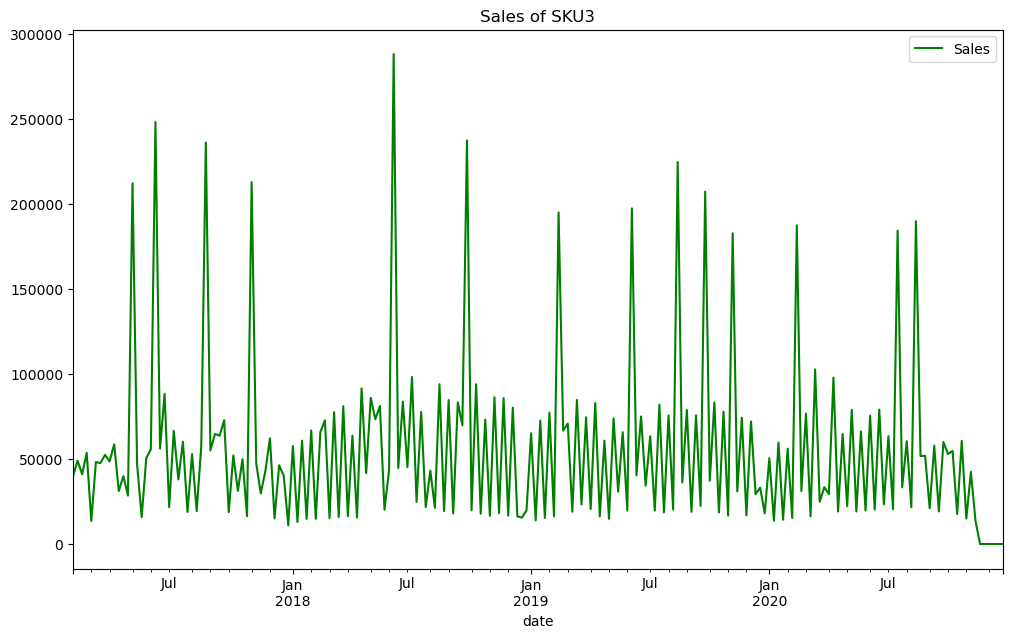

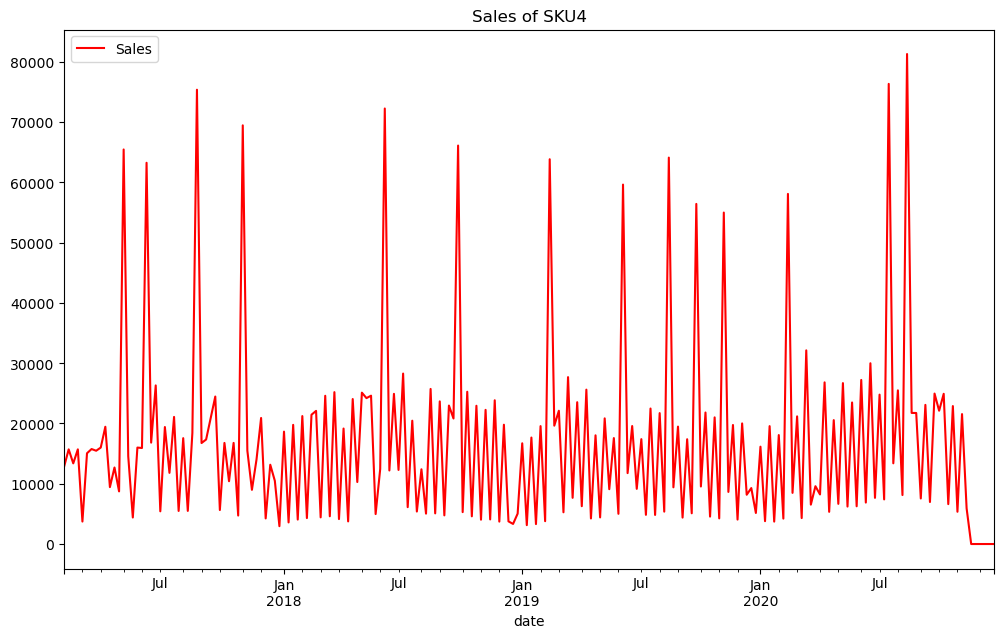

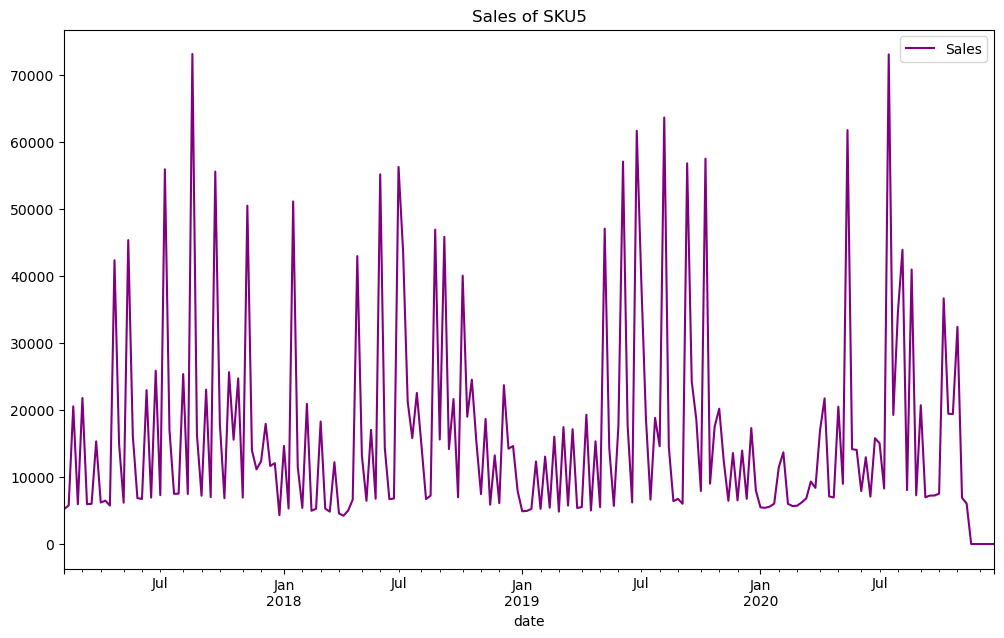

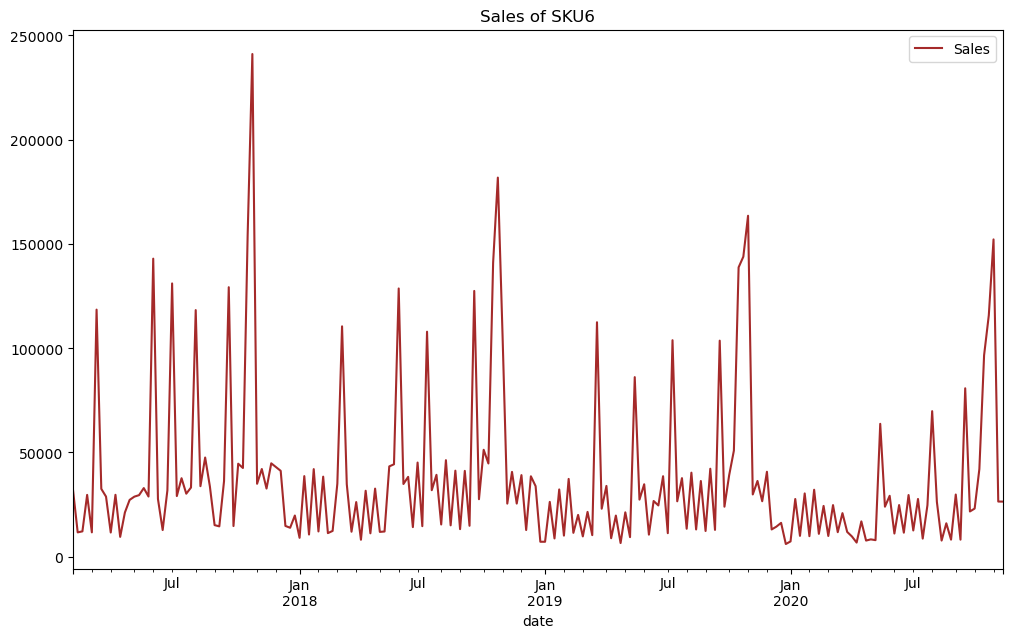

In [14]:
color=['orange', 'blue', 'green', 'red', 'purple', 'brown']

for i, c in zip(range(1, 7), color):
    product_name = 'SKU' + str(i)
    df_sku = df_time[df_time['Product'] == product_name]
    plt.figure(figsize = (12,7))
    
    df_sku['Sales'].plot(title = f'Sales of {product_name}', legend= True, color = c)
    